In [1]:
from whole_neuron_classifier_datajoint_adapted import extract_branches_whole_neuron
import datajoint as dj
import numpy as np
import datajoint as dj
import trimesh
import time

In [2]:
dj.config['database.host'] = '10.28.0.34'
dj.config['database.user'] = 'celiib'
dj.config['database.password'] = 'newceliipass'
dj.config["display.limit"] = 20
    
#schema = dj.schema('microns_ta3p100')
#ta3p100 = dj.create_virtual_module('ta3p100', 'microns_ta3p100')
schema = dj.schema("microns_pinky")
pinky = dj.create_virtual_module("pinky","microns_pinky")


Connecting celiib@10.28.0.34:3306


In [3]:
@schema
class WholeAutoAnnotationsClusters3(dj.Computed):
    definition = """
    # creates the labels for the mesh table
    -> pinky.PymeshfixDecimatedExcitatoryStitchedMesh
    ---
    vertices   : longblob     # label data for the vertices
    triangles  : longblob     # label data for the faces
    """
    
    def make(self, key):
        start_time = time.time()
        
        print("\n\n*****Starting Auto Labeling for " + str(key["segment_id"]) + "******")
        
        segment_id = key["segment_id"]

        #get the vertices and faces from datajoint
        # get the newly stitched mesh
        # get the original mesh

        
        verts,faces = (pinky.PymeshfixDecimatedExcitatoryStitchedMesh() & key).fetch1("vertices","triangles")


        #run the whole algorithm on the neuron to test
        verts_labels, faces_labels = extract_branches_whole_neuron(import_Off_Flag=False,segment_id=segment_id,vertices=verts,
                             triangles=faces,pymeshfix_Flag=False,
                             import_CGAL_Flag=False,
                             return_Only_Labels=True,
                             clusters=3,
                             smoothness=0.2)
        
        #insert the key
        self.insert1(dict(key,
                  vertices=verts_labels,
                  triangles=faces_labels),skip_duplicates=True)


        
        print(f"Finished Auto Labeling: {time.time() - start_time}")
        

In [4]:
start = time.time()
WholeAutoAnnotationsClusters3.populate(reserve_jobs=True)
print(time.time() - start)



*****Starting Auto Labeling for 648518346349499369******
1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: Mesh importing and Pymesh fix: 0.08572506904602051
2) Staring: Generating CGAL segmentation for neuron
Done writing OFF file

Starting CGAL segmentation
Right before cgal segmentation, clusters = 3, smoothness = 0.2
1
Finished CGAL segmentation algorithm: 911.050829410553
2) Finished: Generating CGAL segmentation for neuron: 931.6823563575745
3) Staring: Generating Graph Structure and Identifying Soma
soma_index = 6
3) Finished: Generating Graph Structure and Identifying Soma: 0.3346071243286133
5) Staring: Finding Apical Index
Soma Index = 6
Soma Connections = [34, 41, 32, 83, 13, 14, 24, 28, 25, 40, 179, 22, 93, 117, 152]
soma_80_percent = 241867.3421875
Debugging the axon filter
[(34, 253023.609375), (41, 254280.640625), (32, 259926.03125), (83, 245941.390625), (13, 238274.921875), (14, 258307.34375), (24, 250961.96875), (2

In [5]:
#(schema.jobs & "table_name='__whole_auto_annotations_clusters3'").delete()

In [6]:
#schema.jobs

In [7]:
pinky.WholeAutoAnnotationsClusters3()

segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,vertices label data for the vertices,triangles label data for the faces
3,648518346341371119,0.35,=BLOB=,=BLOB=
3,648518346349386137,0.35,=BLOB=,=BLOB=
3,648518346349470171,0.35,=BLOB=,=BLOB=
3,648518346349471156,0.35,=BLOB=,=BLOB=
3,648518346349471500,0.35,=BLOB=,=BLOB=
3,648518346349471562,0.35,=BLOB=,=BLOB=
3,648518346349471565,0.35,=BLOB=,=BLOB=
3,648518346349471910,0.35,=BLOB=,=BLOB=
3,648518346349472574,0.35,=BLOB=,=BLOB=
3,648518346349472601,0.35,=BLOB=,=BLOB=


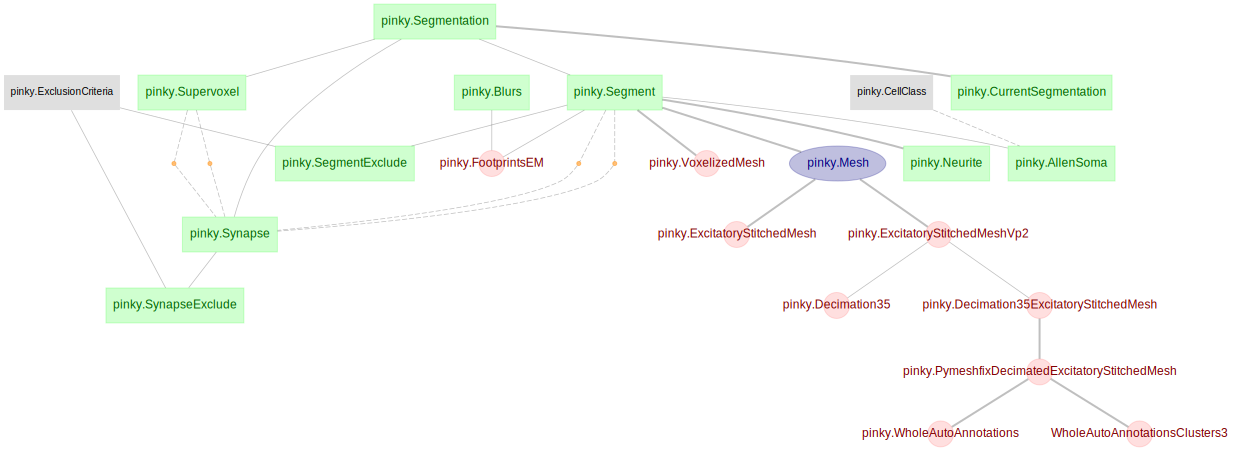

In [12]:
dj.ERD(schema)